In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

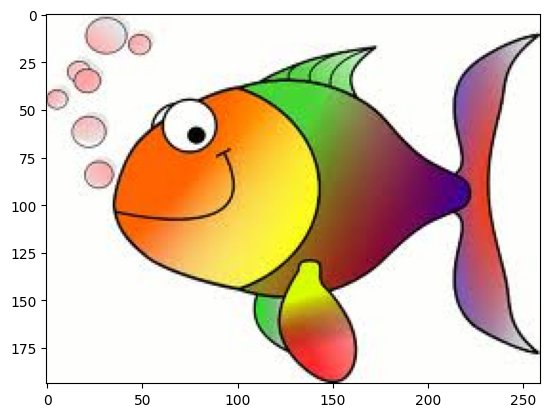

In [3]:
img = cv.imread("/Users/danielavalencia/Desktop/Parcial_Final/OpenCV-images/HappyFish.jpg")[:,:,::-1]
plt.imshow(img)

Realmente la convolución nada más se hace con una imagen en escala de grises, o bien aplicando la convolución canal a canal.

In [23]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

In [24]:
def make_square_kernels(n):
    return 1/n**2 * np.ones((n, n))

In [25]:
make_square_kernels(3).sum() # Nos debería de regresar 1 para indicar que es pasabajas

1.0

In [26]:
cv.filter2D(img_gray, -1, make_square_kernels(3)) #(origen, profundidad del destino, kernel)

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

'-1' nos permite almacenar la imagen convolucionada con la misma profundidad que la imagen original

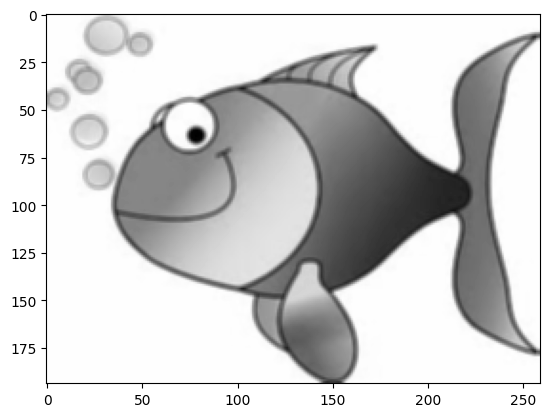

In [27]:
plt.imshow(cv.filter2D(img_gray, -1, make_square_kernels(3)), "gray")

El efecto del suavizado es mayor conforme el kernel aumenta.

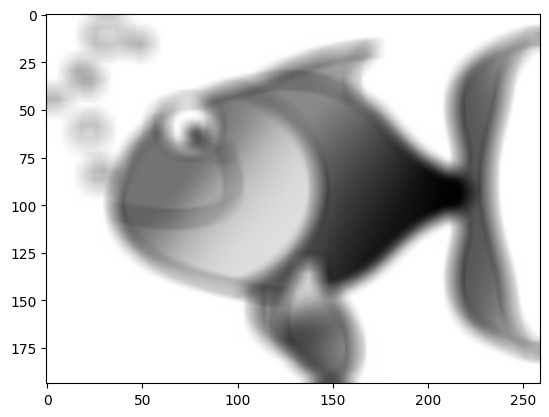

In [28]:
plt.imshow(cv.filter2D(img_gray, -1, make_square_kernels(11)), "gray")

## Gaussiano

In [29]:
cv.GaussianBlur(img_gray, (3,3), 1) #(origen, tamaño del kernel gaussiano a generar, valor de sigma)

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

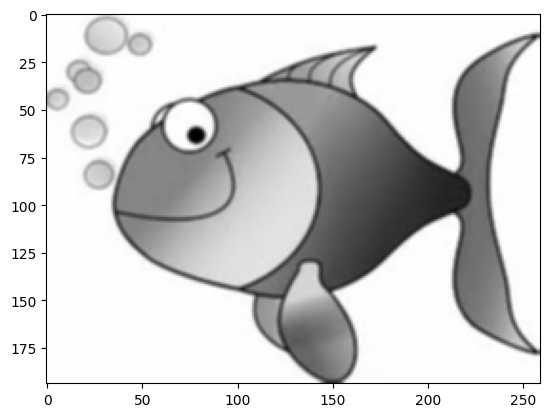

In [30]:
plt.imshow(cv.GaussianBlur(img_gray, (3,3), 1), "gray")

En este caso, el tamaño del kernel no importa. Lo que importa es 'sigma', es decir la desviación estándar.

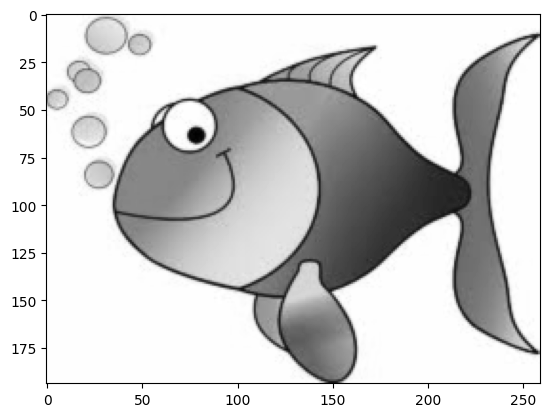

In [31]:
plt.imshow(cv.GaussianBlur(img_gray, (3,3), .5), "gray")

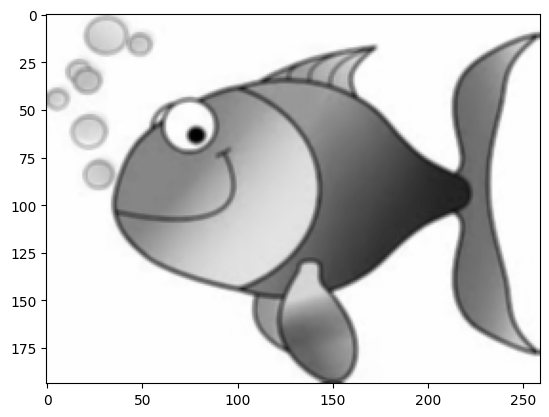

In [32]:
plt.imshow(cv.GaussianBlur(img_gray, (3,3), 30), "gray")

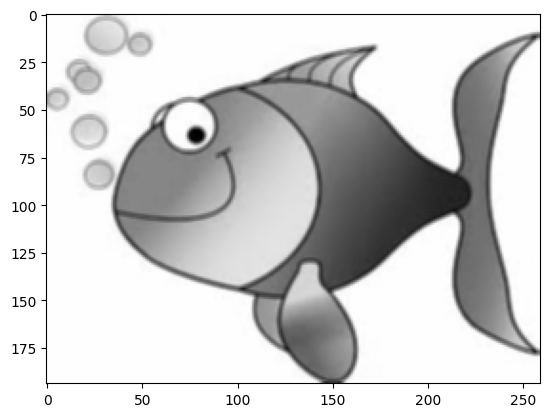

In [33]:
plt.imshow(cv.GaussianBlur(img_gray, (3,3), sigmaX=1, sigmaY=5), "gray") #En este caso favorecemos el crecimiento en Y

## Laplaciano

In [34]:
laplaciano1 = np.array([
                        (0, 1, 0),
                        (1, -4, 1),
                        (0, 1, 0)])
laplaciano2 = np.array([
                        (0, -1, 0),
                        (-1, 4, -1),
                        (0, -1, 0)])
laplaciano3 = np.array([
                        (1, 1, 1),
                        (1, -8, 1),
                        (1, 1, 1)])
laplaciano4 = np.array([
                        (-1, -1, -1),
                        (-1, 8, -1),
                        (-1, -1, -1)])

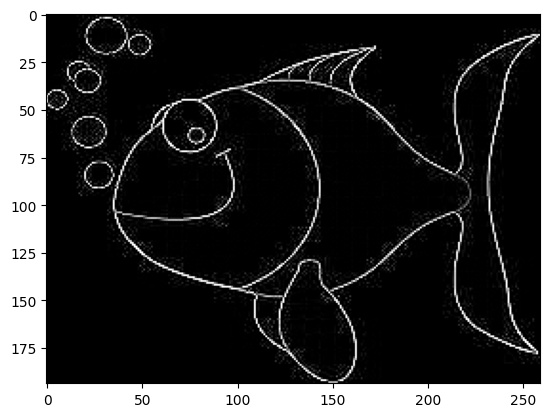

In [35]:
plt.imshow(cv.filter2D(img_gray, -1, laplaciano1), "gray")

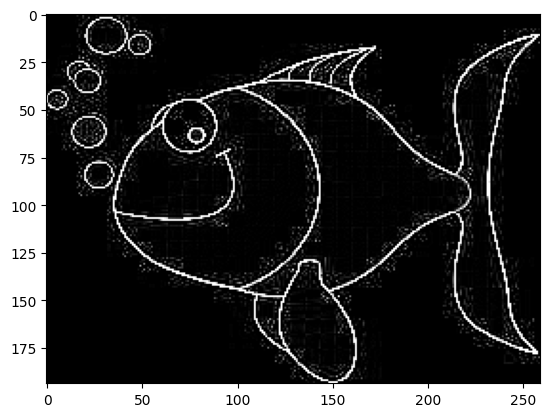

In [36]:
plt.imshow(cv.filter2D(img_gray, -1, laplaciano3), "gray")

In [37]:
img_laplaciano4 = cv.filter2D(img_gray, -1, laplaciano4)
np.unique(img_laplaciano4)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

En este caso vemos que la imagen no está binarizada aunque parezca que sí.

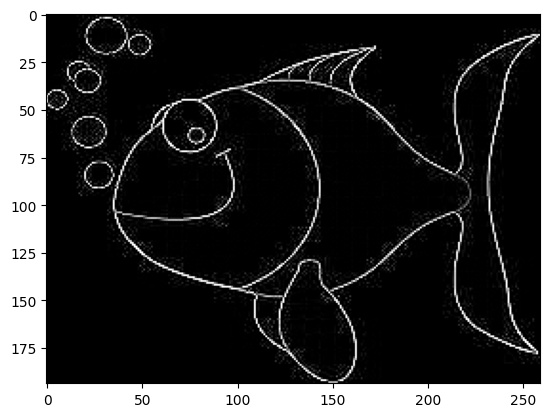

In [38]:
plt.imshow(cv.Laplacian(img_gray,-1,ksize=1),'gray') #funcion de opencv para el laplaciano

'cv.Laplacian' acepta dos valores forzosos pero tiene mas valores que se pueden agregar a la función.
ksize= como se dice es el tamaño del kernel, en este caso por defecto se hace uno pero además esta función no puede aceptar valores pares.
Su rango es de 1-31.


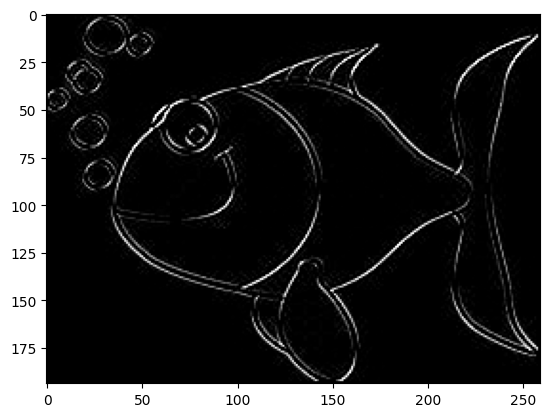

In [39]:
plt.imshow(cv.Sobel(img_gray,-1,1,1),'gray')

In [40]:
#Mediana
o=np.array([[1,2,3],[10,11,20],[90,100,11]],dtype=np.uint8)

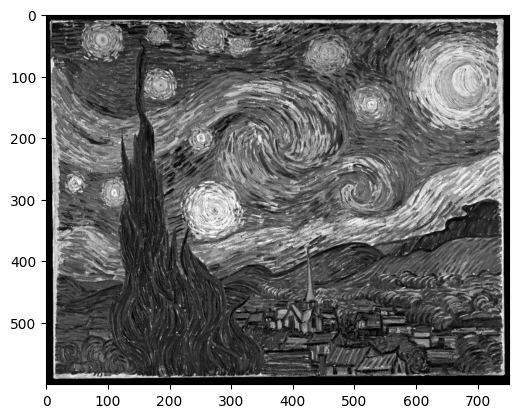

In [45]:
#[1,3,5,10,11,11,20,90,100]->11
ruido=cv.imread('/Users/danielavalencia/Desktop/Parcial_Final/OpenCV-images/starry_night.jpg',0)
plt.imshow(ruido,cmap='gray')

In [46]:
cv.medianBlur(ruido,3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

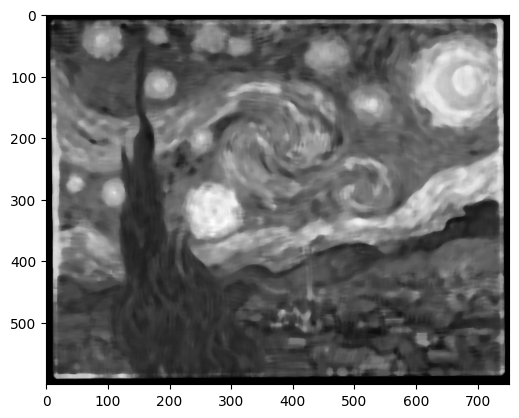

In [47]:
plt.imshow(cv.medianBlur(ruido,11),cmap='gray')